<a href="https://colab.research.google.com/github/sarahJune1/BUS509_sachss/blob/main/notebooks/Module_6/Continuous_Probability_Distributions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# author Sarah Sachs @sarah_june42
import numpy as np
import scipy.stats as stats
import math
import matplotlib.pyplot as plt
import seaborn as sns

# Continuous Probability Distributions

This notebook covers exercises about:

- The uniform distribution 
- The normal distribution
- The exponential distribution
- The lognormal distribution

____

## Uniform Distribution

Suppose a sales team is projecting next month's sales for an existing product line. The sales previously have followed a uniform distribution with a lower limit of \$25,000 and upper limit of $50,000.

What is the mean and standard deviation?

What is the probability that sales exceed \$40,000?

What is the probability that sales are between \$32,000 and $38,000?

In [ ]:
# define interval
a, b = 25000, 50000

In [ ]:
# what is the mean and standard deviation?

def mu_uniform(a,b):
  """
  Computes a+b/2 for a uniform distribution
  """
  return (a+b)/2

In [ ]:
def std_uniform(a,b):
  """
  Computes standard deviation for a uniform distribution
  """
  std = math.sqrt(((b-a)**2)/12)
  return std

In [ ]:
print(f"The mean is: ${mu_uniform(a,b)}")

The mean is: $37500.0


In [ ]:
print(f"The standard deviation is: ${std_uniform(a,b)}")

The standard deviation is: $7216.878364870322


Let's see what a random distribution from the uniform distribution would look like given this interval. 

Code referenced from: https://www.alphacodingskills.com/numpy/numpy-uniform-distribution.php

In [ ]:
# don't forget to set the seed for reproducible results
np.random.seed(42)

In [ ]:
# create random sample of 100 samples from uniform distribution
sample = np.random.uniform(a, b, 100)
print(sample)

[34363.50297118 48767.85766025 43299.84854529 39966.46210493
 28900.46601106 28899.86300841 26452.0903042  46654.40364437
 40027.87529358 42701.8144449  25514.6123574  49247.74630405
 45811.06602001 30308.47776696 29545.62418018 29585.11274634
 32606.05607399 38118.91079081 35798.62546605 32280.72850495
 40296.32236806 28487.3465163  32303.61621338 34159.04608234
 36401.74960543 44629.39903483 29991.84455396 37855.86096034
 39810.36422155 26161.260318   40188.62129754 29263.10309218
 26626.28982463 48722.13843133 49140.80082686 45209.93370291
 32615.34422933 27441.80285016 42105.8256628  36003.81234349
 28050.95587112 37379.42275278 25859.71302788 47733.01005197
 31469.49954    41563.05710885 32792.77690224 38001.70052945
 38667.75698358 29621.36138814 49239.61569411 44378.32058403
 48487.4735391  47370.68376069 39947.49947028 48046.85587558
 27212.3125513  29899.57156048 26130.68222276 33133.25826908
 34716.93224224 31783.72579435 45718.4377288  33918.83316734
 32023.36274218 38567.40

In [ ]:
# how does the mean compare?
sample.mean()

36754.51858445523

In [ ]:
sample.std()

7399.95566581226

We see the mean and standard deviation from our random sample of 100 observations from this uniform distribution is very similar to the output of the formula.

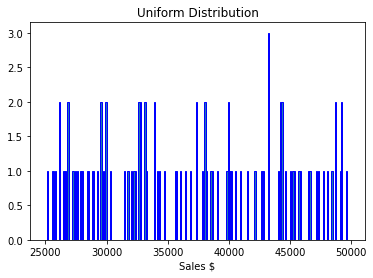

In [ ]:
# let's plot it
bin = np.arange(a, b, 100)

plt.hist(sample, bins=bin, edgecolor='blue') 
plt.title("Uniform Distribution") 
plt.xlabel('Sales $')
plt.show()

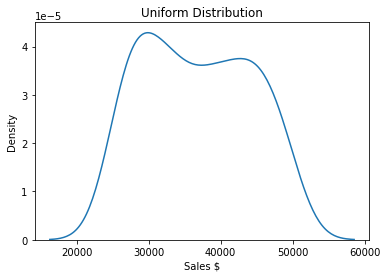

In [ ]:
# how would this look as a continuous distribution
sns.kdeplot(sample)
plt.title("Uniform Distribution") 
plt.xlabel('Sales $')
plt.show()

Solving the probability that sales exceed $40,000 we look to the right of this value on the distribution. Our goal is to measure the area between 40,000 and 50,000, since the base of this area is 10,000 we multiply this by the height which is 1/50,000 - 25,000 = 0.0004

In [ ]:
# solve for probability that sales exceed 40,000
value_x = 40000

# calculate the height
height = 1/(b-a) 
height

4e-05

In [ ]:
# calculate the difference between the value and upper bound area
value_x_interval = b - value_x 
value_x_interval

10000

In [ ]:
print(f"The probability that sales are between $40,000 and $50,000 is: {value_x_interval*height}")

The probability that sales are between $40,000 and $50,000 is: 0.4


Solving the probability that sales are between $32,000 and 38,000, we slice the area in a similar way. In this case we only want the area between this interval so rather than subtract from b, we subtract the base between this interval.

In [ ]:
value_x1 = 32000
value_x2 = 38000

In [ ]:
value_x_interval = value_x2 - value_x1
value_x_interval

6000

In [ ]:
print(f"The probability that sales are between $32,000 and $38,000 is: {value_x_interval*height}")

The probability that sales are between $32,000 and $38,000 is: 0.24000000000000002


Back to presentation

# The Normal Distribution

The following case study is how to graph a distribution given the mean and standard deviation. This code is mostly for demonstration purposes and not directly related to code needed for the homework.


Suppose we know the age of users on social media platform Twitter, TikTok, and Facebook are normally distributed. We are given the following information on the relevant parameters:

In [ ]:
# define the variables for mean and standard deviation
twitter_mean = 25
twitter_std = 8
tt_mean = 18
tt_std = 10
fb_mean = 40
fb_std = 20

In [ ]:
# let's graphically compare the ages between platforms

def norm_dist_coordinates(mu, sigma):
  """
  Return the normal distribution given a mean and standard deviation
  """
  # create x observations
  x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
  # create probability distribution function along y
  return x, stats.norm.pdf(x, mu, sigma)


In [ ]:
# define for each
twitter_x, twitter_y = norm_dist_coordinates(twitter_mean, twitter_std)
tt_x, tt_y = norm_dist_coordinates(tt_mean, tt_std)
fb_x, fb_y = norm_dist_coordinates(fb_mean, fb_std)

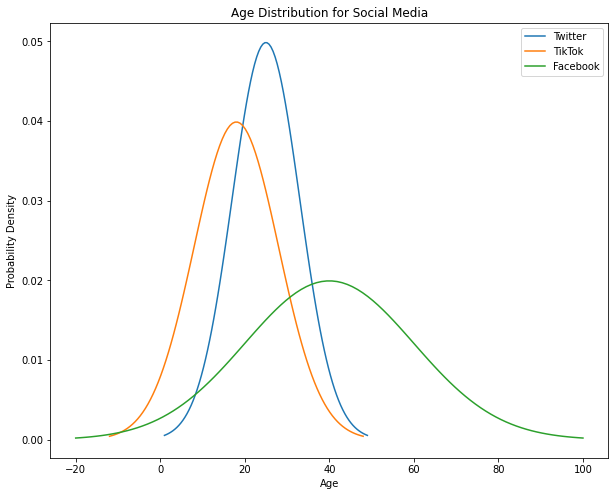

In [ ]:
# let's plot all three together
# define the canvas
plt.figure(figsize=(10,8))
# plot twitter
plt.plot(twitter_x, twitter_y, label='Twitter')
# plot tiktok
plt.plot(tt_x, tt_y, label='TikTok')
# plot fb
plt.plot(fb_x, fb_y, label='Facebook')
# add labels
plt.title('Age Distribution for Social Media')
plt.xlabel('Age')
plt.ylabel('Probability Density')
plt.legend()
plt.show()

We see that the demographics for twitter and tiktok are relatively similar compared to Facebook. The tailedness for Facebook is wider and we see there is a general overlap between all three platforms for the age range of 20-40. 

Notice that the age goes negative which doesn't make sense and also we should assume 2 year olds are not using any of these platforms.

## Calculating the Z score and Probability

Example: 
A company’s ESG score, which approximates the company’s long term sustainability metrics,  are normally distributed with a mean of 72 and standard deviation of 8. 

1. What is the probability that a randomly selected company will score above 60?

2. What is the probability that a randomly selected company will score between 68 and 84?


In [73]:
# define variables
mu = 72
std = 8

In [74]:
# define the variables
esg_x, esg_y = norm_dist_coordinates(mu, std)

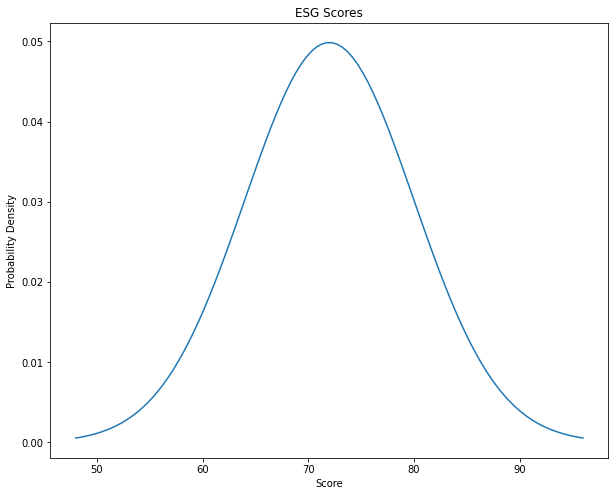

In [75]:
# let's plot the distribution
plt.figure(figsize=(10,8))
plt.plot(esg_x, esg_y)
plt.title('ESG Scores')
plt.xlabel('Score')
plt.ylabel('Probability Density')
plt.show()

This is the the cumulative probability function for our distribution of ESG scores, we see the mean at 70 and a relatively steep middle.

In [76]:
# calculate the probability to score above 60
x = 60

We will use https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html for calcualting the normal distribution and the cumulative density function for our desired value of x. 

In [77]:
# we subtract from 1 since the cdf will provide only the area before the value
1-stats.norm(mu, std).cdf(x)

0.9331927987311419

In [78]:
# probability between 68 and 84
x_low = 68
x_high = 84

In [79]:
stats.norm(mu, std).cdf(x_high) - stats.norm(mu, std).cdf(x_low)

0.624655260005155

# The Exponential Distribution

Let the time between emergency calls for a call center be exponentially distributed with a mean of 25 minutes.
- Calculate the rate parameter λ
- What is the probability that a call does not happen for more than one hour?
- What is the probability you receive a call within 10 minutes?


Calculate the rate parameter λ 

Recall that,
Mean E(X) = 1/λ and λ = 1/E(X)

In [80]:
# define variable
rate_mean = 25

In [81]:
def calc_rate_param(rate_mean):
  """
  Calculates the rate parameter, given that mean 1/rate parameter
  """
  rate_param = 1/rate_mean
  return rate_param

In [82]:
# rate param
rate_param = calc_rate_param(rate_mean)
print("The rate parameter is", rate_param)

The rate parameter is 0.04


What is the probability that a call does not happen for more than one hour?

We are calculating: P(X > 60)


In [84]:
# define x
x = 60

In [85]:
def cum_prob_greater_than(rate_param, x):
  """
  Calculates cumulative probability greater than an x value
  """
  cum_prob = math.e**(-rate_param * x)
  return cum_prob

In [86]:
cum_prob_greater_than(rate_param, x)

0.09071795328941253

For calculating the probability distribution that is less than a given value of x, we can use the above function and simply subtract from 1.

In [87]:
# example, probability that call happens within one hour
1 - cum_prob_greater_than(rate_param, x)

0.9092820467105874

What is the probability you receive a call within 10 minutes?

In [88]:
x = 10

We can use the function and then subtract from 1 since we are looking at the probability less than a value.

In [89]:
1 - cum_prob_greater_than(rate_param, x)

0.3296799539643607

Back to lecture

# The Lognormal Distribution

Consider the price of a penny stock has an underlying normal distribution with a mean of 5 and a standard deviation of 1.2, what is the lognormal distribution mean and standard deviation?

In [90]:
# define inputs
normal_mean = 5
normal_std = 1.2

In [92]:
def lognormal_conversion(normal_mean, normal_std):
  """
  Converts normally distributed mean, std into lognormal
  Returns the lognormal mean and lognormal standard deviation
  """
  logn_mean = math.e**(((2*normal_mean) + normal_std**2)/2)

  logn_std = math.sqrt((math.e**(normal_std**2) - 1) * math.e**((2*normal_mean) +normal_std**2 ) )
  return logn_mean, logn_std

In [93]:
# convert to lognormal
log_mean, log_std = lognormal_conversion(normal_mean, normal_std)

In [94]:
print("The lognormal mean and standard deviation is", log_mean, log_std)

The lognormal mean and standard deviation is 304.9049229569084 547.191435246123


What is the probability that y will be less than or equal to 200?

P(Y ≤ 200) = P(ln(Y) ≤ ln(200)) = P(X ≤ 5.30)

In [95]:
# define variable
x = 200

In [96]:
# convert into lognormal
x_log = np.log(x)
x_log

5.298317366548036

In [97]:
def calc_z_score(mean, std, x):
  """
  Z score calculation
  """
  return (x - normal_mean)/std

In [98]:
z_score = calc_z_score(normal_mean, normal_std, x_log)
z_score

0.24859780545669694

In [99]:
# convert to a normal probability
stats.norm.cdf(z_score)

0.5981640468951666

We can use the stats package for calculating the probability, rather than using the z score and using the table lookup.

In [100]:
stats.norm(normal_mean, normal_std).cdf(x_log)

0.5981640468951666